In [58]:
# Import packages

import numpy as np 
import pandas as pd
from os import listdir
import glob
import plotly
import os
import plotly.graph_objects as go
import pandas as pd
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
# Problem 4:

In [64]:
# Read data

LifeExp = pd.read_csv("C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW1\\ddf--datapoints--life_expectancy_years--by--geo--time.txt")
GDP = pd.read_csv("C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW1\\ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.txt")

In [65]:
LifeExp.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [66]:
GDP.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [67]:
# From the above we can understand that 'geo' and 'time' are common variables in both datasets,
# hence we merge both these datasets

In [68]:
MergeData = pd.merge(LifeExp,GDP, how='inner',left_on=['geo','time'], right_on=['geo','time'])

In [69]:
MergeData.head()

,geo,time,life_expectancy_years,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,28.21,603
1,afg,1801,28.20,603
2,afg,1802,28.19,603
3,afg,1803,28.18,603
4,afg,1804,28.17,603


In [70]:
MergeData =MergeData.groupby(['time']).agg({'time':np.mean,'income_per_person_gdppercapita_ppp_inflation_adjusted': np.mean, 
                                      'life_expectancy_years': np.mean})

In [71]:
MergeData.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
time,,,
1800,1800,944.940217,31.503261
1801,1801,945.375000,31.462717
1802,1802,948.407609,31.478641
1803,1803,948.119565,31.384620
1804,1804,949.793478,31.459891


In [72]:
# Creating log variable in merged dataset
MergeData['Log_income_per_person_gdppercapita_ppp_inflation_adjusted'] = np.log(MergeData['income_per_person_gdppercapita_ppp_inflation_adjusted'])

In [73]:
MergeData.iloc[:,[2]]

,life_expectancy_years
time,
1800,31.503261
1801,31.462717
1802,31.478641
1803,31.384620
1804,31.459891
1805,31.586848
1806,31.645217
1807,31.598424
1808,31.383913


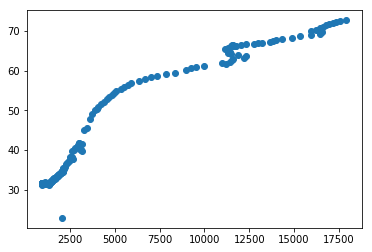

In [74]:
plt.scatter(MergeData['income_per_person_gdppercapita_ppp_inflation_adjusted'], MergeData['life_expectancy_years'])

In [ ]:
# From the above graph we can see the distribution of gdp and life expectancy

In [41]:
MergeData_Train, MergeData_Test = train_test_split(MergeData, test_size=0.2)

In [45]:
MergeData_Train.head()

,geo,time,life_expectancy_years,income_per_person_gdppercapita_ppp_inflation_adjusted,Log_income_per_person_gdppercapita_ppp_inflation_adjusted
11259,eri,2015,63.35,1244,7.126087
14646,grc,1898,40.00,2944,7.987524
5213,brb,1929,40.19,2188,7.690743
24198,mlt,1986,74.28,12918,9.466377
4612,blz,1985,70.97,3704,8.217169


In [53]:
# Building a linear regression model

LogModel = smf.ols(formula="life_expectancy_years ~ Log_income_per_person_gdppercapita_ppp_inflation_adjusted + time",
                           data = MergeData_Train).fit()

LogModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.792
Model:                               OLS   Adj. R-squared:                  0.792
Method:                    Least Squares   F-statistic:                 6.144e+04
Date:                   Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                           18:33:10   Log-Likelihood:            -1.1092e+05
No. Observations:                  32349   AIC:                         2.218e+05
Df Residuals:                      32346   BIC:                         2.219e+05
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -236.7920      1.432   -165.390      0.000    -239.598    -233.986
Log_income_per_person_gdppercapita_ppp_inflation_adjusted     7.7405      0.049    159.475      0.000       7.645       7.836
time                                                          0.1159      0.001    134.772      0.000       0.114       0.118
==============================================================================
Omnibus:                     1304.849   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1486.097
Skew:                          -0.493   Prob(JB):                         0.00
Kurtosis:                       3.360   Cond. No.                     6.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,0,'Expectancy of life')

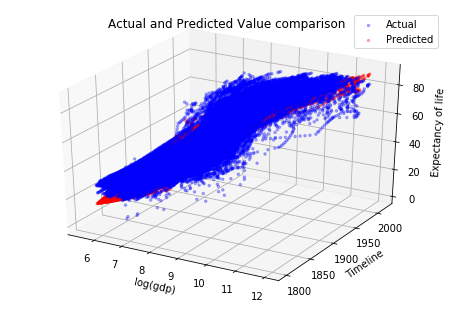

In [55]:
# Creating required visualizations
lifeexpectancypred = LogModel.predict(MergeData_Train)
fig = plt.figure()
figure = Axes3D(fig)
figure.scatter(MergeData_Train['Log_income_per_person_gdppercapita_ppp_inflation_adjusted'], 
           MergeData_Train['time'], 
           MergeData_Train['life_expectancy_years'], 
           label ='Actual',
           s = 6, 
           color ="blue",
          alpha = 0.3) 
figure.scatter(MergeData_Train['Log_income_per_person_gdppercapita_ppp_inflation_adjusted'], 
           MergeData_Train['time'], 
           lifeexpectancypred,
           label ='Predicted', 
           s = 5, 
           color ="red",
          alpha = 0.3) 
figure.legend() 
figure.set_title('Actual and Predicted Value comparison')
figure.set_xlabel('log(gdp)')
figure.set_ylabel('Timeline')
figure.set_zlabel('Expectancy of life')

In [62]:
ModelTrain = LogModel.predict(MergeData_Train)

print('RMSE Train = ' +  str(rmse(MergeData_Train['life_expectancy_years'], ModelTrain, axis=0)))

RMSE Train = 7.461623542192185


In [63]:
ModelTest = LogModel.predict(MergeData_Test)

print('RMSE Test = ' +  str(rmse(MergeData_Test['life_expectancy_years'], ModelTest, axis=0)))

RMSE Test = 7.500106028470663


In [ ]:
# Problem 5:

In [131]:
# Read data

GDP = pd.read_csv("C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW1\\ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.txt")
ChildDeaths = pd.read_csv("C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW1\\ddf--datapoints--child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.txt")

In [132]:
GDPChild = pd.merge(ChildDeaths,GDP, how='inner',left_on=['geo','time'], right_on=['geo','time'])

In [133]:
GDPChild['number_of_child_deaths'] = pd.to_numeric(GDPChild['number_of_child_deaths'])
GDPChild['time'] = pd.to_numeric(GDPChild['time'])

KeyError: 'number_of_child_deaths'

In [ ]:
GDPChild.head()

In [134]:
# Creating log variable in merged dataset
GDPChild['Log_gdppercapita_us_inflation_adjusted'] = np.log(GDPChild['gdppercapita_us_inflation_adjusted'])

In [137]:
GDPChild.head()

,geo,time,child_mortality_0_5_year_olds_more_years_version_7,gdppercapita_us_inflation_adjusted,Log_gdppercapita_us_inflation_adjusted
0,afg,2002,129.4,364.57057,5.898720
1,afg,2003,125.9,376.75871,5.931605
2,afg,2004,122.4,364.09544,5.897416
3,afg,2005,119.0,389.41636,5.964649
4,afg,2006,115.8,397.98590,5.986417


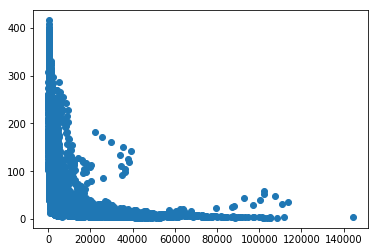

In [138]:
plt.scatter(GDPChild['gdppercapita_us_inflation_adjusted'], GDPChild['child_mortality_0_5_year_olds_more_years_version_7'])

In [139]:
GDPChild_Train, GDPChild_Test = train_test_split(GDPChild, test_size=0.2)

In [140]:
GDPChild_Train.head()

,geo,time,child_mortality_0_5_year_olds_more_years_version_7,gdppercapita_us_inflation_adjusted,Log_gdppercapita_us_inflation_adjusted
3126,hrv,2012,4.7,13660.25631,9.522246
5147,nic,1994,55.5,1076.04254,6.981045
3652,jpn,1996,5.5,41514.89779,10.633808
2723,gin,1998,184.7,569.34876,6.344493
6428,svn,2005,4.3,22029.43035,10.000135


In [141]:
# Building a linear regression model

LogModel2 = smf.ols(formula="child_mortality_0_5_year_olds_more_years_version_7 ~ Log_gdppercapita_us_inflation_adjusted + time",
                           data = GDPChild_Train).fit()

LogModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     child_mortality_0_5_year_olds_more_years_version_7   R-squared:                       0.634
Model:                                                            OLS   Adj. R-squared:                  0.634
Method:                                                 Least Squares   F-statistic:                     5282.
Date:                                                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                                                        19:03:12   Log-Likelihood:                -32173.
No. Observations:                                                6094   AIC:                         6.435e+04
Df Residuals:                                                    6091   BIC:                         6.437e+04
Df Model:                                                           2                                         
Covariance Type:                                            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               4074.1086     82.989     49.092      0.000    3911.420    4236.797
Log_gdppercapita_us_inflation_adjusted   -34.6837      0.409    -84.721      0.000     -35.486     -33.881
time                                      -1.8650      0.042    -44.504      0.000      -1.947      -1.783
==============================================================================
Omnibus:                      693.248   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1041.096
Skew:                           0.840   Prob(JB):                    8.49e-227
Kurtosis:                       4.131   Cond. No.                     2.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,0,'Expectancy of life')

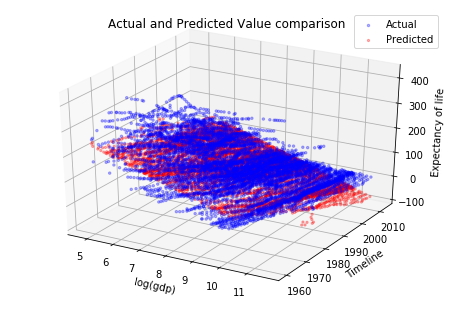

In [142]:
# Creating required visualizations
childdeaths = LogModel2.predict(GDPChild_Train)
fig = plt.figure()
figure = Axes3D(fig)
figure.scatter(GDPChild_Train['Log_gdppercapita_us_inflation_adjusted'], 
           GDPChild_Train['time'], 
           GDPChild_Train['child_mortality_0_5_year_olds_more_years_version_7'], 
           label ='Actual',
           s = 6, 
           color ="blue",
          alpha = 0.3) 
figure.scatter(GDPChild_Train['Log_gdppercapita_us_inflation_adjusted'], 
           GDPChild_Train['time'], 
           childdeaths,
           label ='Predicted', 
           s = 5, 
           color ="red",
          alpha = 0.3) 
figure.legend() 
figure.set_title('Actual and Predicted Value comparison')
figure.set_xlabel('log(gdp)')
figure.set_ylabel('Timeline')
figure.set_zlabel('Expectancy of life')

In [143]:
ModelTrain2 = LogModel2.predict(GDPChild_Train)

print('RMSE Train = ' +  str(rmse(GDPChild_Train['child_mortality_0_5_year_olds_more_years_version_7'], ModelTrain2, axis=0)))

RMSE Train = 47.49304696306578


In [144]:
ModelTest2 = LogModel2.predict(GDPChild_Test)

print('RMSE Train = ' +  str(rmse(GDPChild_Test['child_mortality_0_5_year_olds_more_years_version_7'], ModelTest2, axis=0)))

RMSE Train = 49.087815730313004
